In [1]:
import pandas as pd
import numpy as np
from openpyxl import Workbook as wb

In [2]:
June_SEs = pd.read_csv("data/PEAL - Standards Evaluation - June_2024.csv", low_memory = False)

In [3]:
June_SEs.head(1)

,SubmissionDate,starttime,endtime,text_audit,ev_date,district_0,enumerator,cluster_0,village_0,ev_month,...,liquid_manure_nursery,organic_pesticides_nursery,nursery_watered,crop_varieties_planted,village_instance,final_instance,instanceID,instanceName,formdef_version,KEY
0,15/06/2024 15:06,15/06/2024 13:38,15/06/2024 14:12,https://rtvuganda.surveycto.com/view/submissio...,15/06/2024,Kyenjojo,Arinda Louis,Kasaba,Kasaba_A,23.0,...,NaN,NaN,NaN,NaN,Kasaba_A,Household SE:Spencer Rukundo,uuid:25b52497-9473-40d9-8c23-0ca36aac446e,Household SE:Spencer Rukundo,2406141821,uuid:25b52497-9473-40d9-8c23-0ca36aac446e


In [4]:
HHLevel = June_SEs[June_SEs['standards_report'] == 'Household'].copy()

In [5]:
HHLevel.head(1)

,SubmissionDate,starttime,endtime,text_audit,ev_date,district_0,enumerator,cluster_0,village_0,ev_month,...,liquid_manure_nursery,organic_pesticides_nursery,nursery_watered,crop_varieties_planted,village_instance,final_instance,instanceID,instanceName,formdef_version,KEY
0,15/06/2024 15:06,15/06/2024 13:38,15/06/2024 14:12,https://rtvuganda.surveycto.com/view/submissio...,15/06/2024,Kyenjojo,Arinda Louis,Kasaba,Kasaba_A,23.0,...,NaN,NaN,NaN,NaN,Kasaba_A,Household SE:Spencer Rukundo,uuid:25b52497-9473-40d9-8c23-0ca36aac446e,Household SE:Spencer Rukundo,2406141821,uuid:25b52497-9473-40d9-8c23-0ca36aac446e


In [6]:
VLevel = June_SEs[June_SEs['standards_report'] == 'Village'].copy()

In [7]:
VLevel.head(1)

,SubmissionDate,starttime,endtime,text_audit,ev_date,district_0,enumerator,cluster_0,village_0,ev_month,...,liquid_manure_nursery,organic_pesticides_nursery,nursery_watered,crop_varieties_planted,village_instance,final_instance,instanceID,instanceName,formdef_version,KEY
17,15/06/2024 15:07,15/06/2024 12:05,15/06/2024 13:51,https://rtvuganda.surveycto.com/view/submissio...,15/06/2024,Kyenjojo,Mugisa David,Kasaba,Kasaba_B,23.0,...,NaN,NaN,NaN,NaN,Kasaba_B,Village SE:Kasaba_B,uuid:d8d606a1-f1eb-4270-a4ef-803e14173c57,Village SE:Kasaba_B,2406141821,uuid:d8d606a1-f1eb-4270-a4ef-803e14173c57


In [8]:
HHLevel['Water control Practice'] = np.where(HHLevel['water_mgt_methods_num'] > 0, 1,0)
HHLevel['Soil Management Practice'] = np.where(HHLevel['soil_mgt_methods_num'] > 1, 1,0)
HHLevel['KAP Livestock'] = np.where(HHLevel['kap_livestock_num'] > 3, 1,0)
HHLevel['KAP Agriculture'] = np.where(HHLevel['kap_farm_practices_num'] > 3, 1,0)
HHLevel['3 Composts'] = np.where(HHLevel['composts_num'] > 2, 1,0)
HHLevel['Vegetable gardening Practices'] = np.where(HHLevel['vegetable_farm_mode_num'] > 0, 1,0)

In [9]:
HHLevel[['Water control Practice', 'Soil Management Practice', 
     'Vegetable gardening Practices', 'KAP Livestock', 'KAP Agriculture', '3 Composts']].head(1)

,Water control Practice,Soil Management Practice,Vegetable gardening Practices,KAP Livestock,KAP Agriculture,3 Composts
0,1,1,0,0,1,1


In [10]:
HHLevel['Compost Compliance'] =  HHLevel[['3 Composts', 'composts_standard', 'forms_non_bio',
                                  'composts_free_runoff', 'composts_manure_usuage']].mean(axis = 1)

In [11]:
HHLevel['Drying Method Num'] = HHLevel[['drying_method_1','drying_method_2',
                                    'drying_method_3']].sum(axis = 1)

In [12]:
HHLevel['Drying Method'] = np.where(HHLevel['Drying Method Num'] > 1,1,0)

In [13]:
HHLevel['Post harvest handling'] = HHLevel[['Drying Method', 'sorting_grading_done', 
                                     'post_harvest_sys_present']].mean(axis = 1)

In [14]:
HHLevel['Agric Compliance'] = HHLevel[['Compost Compliance', 'Post harvest handling', 'Water control Practice',
                               'Soil Management Practice', 'Vegetable gardening Practices', 
                               'hh_apply_lq_manure', 'hh_organic_pesticides']].mean(axis = 1)

In [15]:
WASH = ['latrine_present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted']

In [16]:
HHLevel[WASH] = HHLevel[WASH].apply(pd.to_numeric, errors='coerce')

In [17]:
HHLevel['WASH Compliance'] = HHLevel[WASH].mean(axis = 1)

In [18]:
Livestock = ['gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
             'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted']

In [19]:
HHLevel['Livestock Compliance'] = HHLevel[Livestock].mean(axis = 1)

In [20]:
HHLevel['Overall Compliance'] = HHLevel[['Agric Compliance', 'WASH Compliance', 
                                 'Livestock Compliance', 'vlsa_membership']].mean(axis = 1)

In [21]:
HHLevel['NPS Classified'] = np.where(HHLevel['overall_nps'] < 7, 'Detractor', 
                                 np.where(HHLevel['overall_nps'] > 8, 'Promoter','Passive'))

In [22]:
Village_NPS = HHLevel.groupby(['district_0', 'cluster_0', 'village_0'])['NPS Classified'].value_counts().unstack(fill_value=0)

Village_NPS['Total'] = Village_NPS.sum(axis=1)

Village_NPS['Detractors(%)'] = (Village_NPS['Detractor'] / Village_NPS['Total']) * 100
Village_NPS['Passives(%)'] = (Village_NPS['Passive'] / Village_NPS['Total']) * 100
Village_NPS['Promoters(%)'] = (Village_NPS['Promoter'] / Village_NPS['Total']) * 100

Village_NPS['Overall NPS (%)'] = Village_NPS['Promoters(%)'] - Village_NPS['Detractors(%)']

Village_NPS = Village_NPS.reset_index()[
    ['district_0', 'cluster_0', 'village_0', 'Detractors(%)', 'Passives(%)', 'Promoters(%)', 'Overall NPS (%)']
]
Village_NPS.to_excel('Village_NPS.xlsx', index=False)

In [23]:
Cluster_NPS = HHLevel.groupby(['district_0', 'cluster_0'])['NPS Classified'].value_counts().unstack(fill_value=0)

Cluster_NPS ['Total'] = Cluster_NPS .sum(axis=1)

Cluster_NPS ['Detractors(%)'] = (Cluster_NPS ['Detractor'] / Cluster_NPS ['Total']) * 100
Cluster_NPS ['Passives(%)'] = (Cluster_NPS ['Passive'] / Cluster_NPS ['Total']) * 100
Cluster_NPS ['Promoters(%)'] = (Cluster_NPS ['Promoter'] / Cluster_NPS ['Total']) * 100

Cluster_NPS ['Overall NPS (%)'] = Cluster_NPS ['Promoters(%)'] - Cluster_NPS ['Detractors(%)']

Cluster_NPS  = Cluster_NPS .reset_index()[
    ['district_0', 'cluster_0', 'Detractors(%)', 'Passives(%)', 'Promoters(%)', 'Overall NPS (%)']
]

Cluster_NPS .to_excel('NPSCluster.xlsx', index=False)

In [24]:
HHLevel['VSLACommitte'] = np.where(HHLevel['vlts_committee_score'] < 7, 'Detractor', 
                                 np.where(HHLevel['vlts_committee_score'] > 8, 'Promoter','Passive'))

In [25]:
# Group by the relevant columns and get the counts
NPS_table = HHLevel.groupby(['district_0', 'cluster_0', 'village_0'])['VSLACommitte'].value_counts().unstack(fill_value=0)

# Add a total count column
NPS_table['Total'] = NPS_table.sum(axis=1)

# Calculate percentages for each category, handling missing columns gracefully
NPS_table['Detractors(%)'] = (NPS_table.get('Detractor', 0) / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table.get('Passive', 0) / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table.get('Promoter', 0) / NPS_table['Total']) * 100

# Verify the resulting DataFrame
#print(NPS_table.head())

In [26]:
HHLevel['Agric Champions'] = np.where(HHLevel[ 'agric_champion_score'] < 7, 'Detractor', 
                                 np.where(HHLevel[ 'agric_champion_score'] > 8, 'Promoter','Passive'))

In [27]:
NPS_table = HHLevel.groupby(['district_0', 'cluster_0', 'village_0'])['Agric Champions'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table.get('Detractor', 0) / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table.get('Passive', 0) / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table.get('Promoter', 0) / NPS_table['Total']) * 100



In [28]:
HHLevel['WASH Champions'] = np.where(HHLevel['wash_champion_score'] < 7, 'Detractor', 
                                 np.where(HHLevel['wash_champion_score'] > 8, 'Promoter','Passive'))

In [29]:
NPS_table = HHLevel.groupby(['district_0', 'cluster_0', 'village_0'])['WASH Champions'].value_counts().unstack(fill_value=0)

NPS_table['Total'] = NPS_table.sum(axis=1)

NPS_table['Detractors(%)'] = (NPS_table.get('Detractor', 0) / NPS_table['Total']) * 100
NPS_table['Passives(%)'] = (NPS_table.get('Passive', 0) / NPS_table['Total']) * 100
NPS_table['Promoters(%)'] = (NPS_table.get('Promoter', 0) / NPS_table['Total']) * 100



In [30]:
Village_Scores = HHLevel.groupby(['district_0',  'cluster_0',  'village_0', 'ev_month'])[['Overall Compliance', 'Agric Compliance', 'WASH Compliance', 
                            'Livestock Compliance', 'vlsa_membership', 'Compost Compliance', 
                            '3 Composts', 'composts_standard', 'forms_non_bio', 'composts_free_runoff', 
                            'composts_manure_usuage', 'Post harvest handling', 'Water control Practice',
                            'Soil Management Practice', 'Vegetable gardening Practices', 'hh_apply_lq_manure', 
                            'hh_organic_pesticides', 'latrine_present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted', 'gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
                            'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted', 'KAP Livestock', 
                            'KAP Agriculture']].mean(numeric_only = True).reset_index()
Village_Scores = Village_Scores.sort_values(
    by=['district_0', 'cluster_0', 'Overall Compliance'], 
    ascending=[True, True, False]
)

In [31]:
Village_Scores.to_excel('Village_Scores.xlsx', index = False)

In [32]:
Cluster_Scores = HHLevel.groupby(['district_0',  'cluster_0', 'ev_month'])[['Overall Compliance', 'Agric Compliance', 'WASH Compliance', 
                            'Livestock Compliance', 'vlsa_membership', 'Compost Compliance', 
                            '3 Composts', 'composts_standard', 'forms_non_bio', 'composts_free_runoff', 
                            'composts_manure_usuage', 'Post harvest handling', 'Water control Practice',
                            'Soil Management Practice', 'Vegetable gardening Practices', 'hh_apply_lq_manure', 
                            'hh_organic_pesticides', 'latrine_present', 'latrine_cover_present', 'latrine_floor_sealed',
                              'latrine_door_present', 'latrine_walls_sealed', 'latrine_roofleak_proof',
                              'latrine_environ_free_debris', 'latri_environ_free_feaces', 'tippy_tap_present',
                              'tippy_fill_water', 'soap_ash_present', 'tippy_tap_wet_area', 'cloth_hangline',
                              'kitchen_present', 'kitchen_ventilated', 'kitchen_clean', 'bathroom_present',
                              'bath_drainage_present', 'bathroom_clean', 'compound_clean', 'double_dishrack',
                              'non_bio_waste_properly_sorted', 'gs_pen_constr', 'gs_pen_constr', 'gs_droppings_composted', 
                            'pg_sty_constr', 'pg_sty_clean', 'pg_droppings_composted', 'KAP Livestock', 
                            'KAP Agriculture']].mean(numeric_only = True).reset_index()

In [33]:
Cluster_Scores.to_excel('Cluster_Scores.xlsx', index = False)

In [34]:
Cluster_ScoresA = Cluster_Scores.applymap(lambda x: x * 100 if isinstance(x, (int, float)) else x)

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/2332091296.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Cluster_ScoresA = Cluster_Scores.applymap(lambda x: x * 100 if isinstance(x, (int, float)) else x)


In [35]:
Cluster_ScoresA.to_excel('Cluster_ScoresA.xlsx', index = False)

In [36]:
Village_ScoresA = Village_Scores.applymap(lambda x: x * 100 if isinstance(x, (int, float)) else x)

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/3433828518.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Village_ScoresA = Village_Scores.applymap(lambda x: x * 100 if isinstance(x, (int, float)) else x)


In [37]:
Village_ScoresA.to_excel('Village_ScoresA.xlsx', index = False)

In [38]:
Village_ScoresA.to_csv('Village_ScoresA.csv', index = False)

In [39]:
JuneSEs = {'Sheet1': Cluster_ScoresA, 'Sheet2': Village_ScoresA}

# Create a new Excel writer object
with pd.ExcelWriter('RTV2024JuneSEs.xlsx', engine='openpyxl') as writer:
    for sheet_name, df in JuneSEs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Data saved successfully in 'RTV2024JuneSEs.xlsx'")

Data saved successfully in 'RTV2024JuneSEs.xlsx'


In [40]:
def determine_conclusion(score):
    if score < 70:
        return "Off-Track - Issue of Missing Program Targets"
    elif 70 <= score <= 79:
        return "At Risk - Below Program Targets with Major Areas to Address"
    elif 80 <= score <= 89:
        return "On Track - Near Program Targets with Minor Areas to Address"
    else:
        return "On Track - Meet or Exceed Program Targets"

# Apply the function to the "Overall score" column to create a new "Conclusions" column
Village_ScoresA['Overall Compliance Comment'] = Village_ScoresA['Overall Compliance'].apply(determine_conclusion)
Village_ScoresA['Agric Compliance Comment'] = Village_ScoresA['Agric Compliance'].apply(determine_conclusion)
Village_ScoresA['WASH Compliance Comment'] = Village_ScoresA['WASH Compliance'].apply(determine_conclusion)
Village_ScoresA['Livestock Compliance Comment'] = Village_ScoresA['Livestock Compliance'].apply(determine_conclusion)
Village_ScoresA['VSLA Participation Comment'] = Village_ScoresA['vlsa_membership'].apply(determine_conclusion)

# Create a new DataFrame with the "Overall score" and "Conclusions" columns
Conclusions = Village_ScoresA[['district_0',  'cluster_0', 'village_0', 'ev_month','Overall Compliance Comment',
                              'Agric Compliance Comment', 'WASH Compliance Comment', 'Livestock Compliance Comment',
                              'VSLA Participation Comment']]

Conclusions.to_excel('Conclusions.xlsx', index = False)

Collective Marketing

In [41]:
HHLevel['Beans Individual selling'] = np.where(HHLevel['Beans_selling_methods'] == 1, 1,0)
HHLevel['Beans Group selling'] = np.where(HHLevel['Beans_selling_methods'] == 2, 1,0)
HHLevel['Maize Individual selling'] = np.where(HHLevel['Maize_selling_methods'] == 1, 1,0)
HHLevel['Maize Group selling'] = np.where(HHLevel['Maize_selling_methods'] == 2, 1,0)
HHLevel['Peas Individual selling'] = np.where(HHLevel['Peas_selling_methods'] == 1, 1,0)
HHLevel['Peas Group selling'] = np.where(HHLevel['Peas_selling_methods'] == 2, 1,0)
HHLevel['SoyaBean Individual selling'] = np.where(HHLevel['SoyaBean_selling_methods'] == 1, 1,0)
HHLevel['SoyaBean Group selling'] = np.where(HHLevel['SoyaBean_selling_methods'] == 2, 1,0)
HHLevel['GroundNuts Individual selling'] = np.where(HHLevel['GroundNuts_selling_methods'] == 1, 1,0)
HHLevel['GroundNuts Group selling'] = np.where(HHLevel['GroundNuts_selling_methods'] == 2, 1,0)

In [42]:
Marketing = HHLevel[HHLevel['ev_month'] == 6 ].copy()

In [43]:
Village_Collective = Marketing.groupby(['district_0',  'cluster_0',  'village_0'])[['has_planted', 'crop_harvested', 'Beans Individual selling', 
                                                                                   'Beans Group selling', 'Maize Individual selling', 'Maize Group selling',
                                                                                   'Peas Individual selling', 'Peas Group selling', 'SoyaBean Individual selling',
                                                                                   'SoyaBean Group selling', 'GroundNuts Individual selling', 
                                                                                   'GroundNuts Group selling']].mean(numeric_only = True).reset_index()

In [44]:
CollectiveM = Marketing.groupby(['district_0'])[['has_planted', 'crop_harvested', 'Beans Individual selling', 
                                                                                   'Beans Group selling', 'Beans_harvest_sold', 'Beans_selling_price', 'Maize Individual selling', 'Maize Group selling',
                                                                                   'Maize_harvest_sold', 'Maize_selling_price', 'Peas Individual selling', 'Peas Group selling', 
                                                 'Peas_harvest_sold', 'Peas_selling_price', 'SoyaBean Individual selling',
                                                                                   'SoyaBean Group selling', 'SoyaBean_harvest_sold', 'SoyaBean_selling_price','GroundNuts Individual selling', 
                                                                                   'GroundNuts Group selling', 'GroundNuts_harvest_sold', 'GroundNuts_selling_price',]].mean(numeric_only = True).reset_index()

In [45]:
CollectiveM.to_excel('Marketing.xlsx', index = False)

In [46]:
Village_Collective.to_excel('CollectiveMarketing.xlsx', index = False)

Coffee Farming

In [47]:
Coffee_Farming = HHLevel[(HHLevel['district_0'] == 'Kitagwenda') & (HHLevel['crops_list_current_season_8'] == 1)].copy()

In [48]:
Coffee_Farming['Space btn Trees in a line'] = np.where(Coffee_Farming['coffee_space'] == 3, 1,0)
Coffee_Farming['Space btn lines'] = np.where(Coffee_Farming['coffee_space'] == 3, 1,0)
Coffee_Farming['Space btn lines'] = np.where(Coffee_Farming['planting_method'] == 1, 1,0)

In [49]:
Coffee_Compliance = Coffee_Farming.groupby(['district_0',  'cluster_0',  'village_0'])[['crops_list_current_season_8', 'crops_list_planted_8', 'Coffee_quantity_recieved',
                                                                                       'Space btn Trees in a line', 'Space btn lines', 'Space btn lines']].mean(numeric_only = True).reset_index()

In [50]:
Coffee_Compliance.to_excel('Coffee_Compliance.xlsx', index = False)

Champion Model

In [51]:
ChampionsModel = HHLevel[['district_0',  'cluster_0',  'village_0', 'agric_champion_satisfication', 'agric_champion_score', 
                           'wash_champion_satisfication', 'wash_champion_score', 'vlts_committee_support',  'vlts_committee_score']] 

In [52]:
ChampionsModel.head(1)

,district_0,cluster_0,village_0,agric_champion_satisfication,agric_champion_score,wash_champion_satisfication,wash_champion_score,vlts_committee_support,vlts_committee_score
0,Kyenjojo,Kasaba,Kasaba_A,1.0,10.0,1.0,10.0,NaN,NaN


In [53]:
ChampionsModel['AgricChampion NPS Classified'] = np.where(ChampionsModel['agric_champion_score'] < 7, 'Detractor', 
                                 np.where(ChampionsModel['agric_champion_score'] > 8, 'Promoter','Passive'))

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/2271486492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChampionsModel['AgricChampion NPS Classified'] = np.where(ChampionsModel['agric_champion_score'] < 7, 'Detractor',


In [54]:
Agric_NPS = ChampionsModel.groupby(['district_0', 'cluster_0', 'village_0'])['AgricChampion NPS Classified'].value_counts().unstack(fill_value=0)

Agric_NPS['Total'] = Agric_NPS.sum(axis=1)

Agric_NPS['Detractors(%)'] = (Agric_NPS['Detractor'] / Agric_NPS['Total']) * 100
Agric_NPS['Passives(%)'] = (Agric_NPS['Passive'] / Agric_NPS['Total']) * 100
Agric_NPS['Promoters(%)'] = (Agric_NPS['Promoter'] / Agric_NPS['Total']) * 100

Agric_NPS['Overall NPS (%)'] = Agric_NPS['Promoters(%)'] - Agric_NPS['Detractors(%)']

Agric_NPS = Agric_NPS.reset_index()[
    ['district_0', 'cluster_0', 'village_0', 'Overall NPS (%)']
]
Agric_NPS.to_excel('Agric_NPS.xlsx', index=False)

In [55]:
ChampionsModel['WashChampion NPS Classified'] = np.where(ChampionsModel['wash_champion_score'] < 7, 'Detractor', 
                                 np.where(ChampionsModel['wash_champion_score'] > 8, 'Promoter','Passive'))

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/1422949246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChampionsModel['WashChampion NPS Classified'] = np.where(ChampionsModel['wash_champion_score'] < 7, 'Detractor',


In [56]:
wash_NPS = ChampionsModel.groupby(['district_0', 'cluster_0', 'village_0'])['WashChampion NPS Classified'].value_counts().unstack(fill_value=0)

wash_NPS['Total'] = wash_NPS.sum(axis=1)

wash_NPS['Detractors(%)'] = (wash_NPS['Detractor'] / wash_NPS['Total']) * 100
wash_NPS['Passives(%)'] = (wash_NPS['Passive'] / wash_NPS['Total']) * 100
wash_NPS['Promoters(%)'] = (wash_NPS['Promoter'] / wash_NPS['Total']) * 100

wash_NPS['Overall NPS (%)'] = wash_NPS['Promoters(%)'] - wash_NPS['Detractors(%)']

wash_NPS = wash_NPS.reset_index()[
    ['district_0', 'cluster_0', 'village_0', 'Overall NPS (%)']
]
wash_NPS.to_excel('wash_NPS.xlsx', index=False)

In [57]:
ChampionsModel['VSLAChampion NPS Classified'] = np.where(ChampionsModel['vlts_committee_score'] < 7, 'Detractor', 
                                 np.where(ChampionsModel['vlts_committee_score'] > 8, 'Promoter','Passive'))

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/766616986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChampionsModel['VSLAChampion NPS Classified'] = np.where(ChampionsModel['vlts_committee_score'] < 7, 'Detractor',


In [58]:
vlts_NPS = ChampionsModel.groupby(['district_0', 'cluster_0', 'village_0'])['VSLAChampion NPS Classified'].value_counts().unstack(fill_value=0)

vlts_NPS['Total'] = vlts_NPS.sum(axis=1)

vlts_NPS['Detractors(%)'] = (vlts_NPS['Detractor'] / vlts_NPS['Total']) * 100
vlts_NPS['Passives(%)'] = (vlts_NPS['Passive'] / vlts_NPS['Total']) * 100
vlts_NPS['Promoters(%)'] = (vlts_NPS['Promoter'] / vlts_NPS['Total']) * 100

vlts_NPS['Overall NPS (%)'] = vlts_NPS['Promoters(%)'] - vlts_NPS['Detractors(%)']

vlts_NPS = vlts_NPS.reset_index()[
    ['district_0', 'cluster_0', 'village_0', 'Overall NPS (%)']
]
vlts_NPS.to_excel('vlts_NPS.xlsx', index=False)

Village Level

In [59]:
VLevel['VSLAs_num'] = VLevel[['vsla_type1_1', 'vsla_type1_2', 'vsla_type1_3']].sum(axis = 1)

In [60]:
VLevel_SEs = VLevel.groupby(['district_0',  'cluster_0',  'village_0', 'ev_month'])[['water_sources_num', 'wuc1', 'wuc1_fetch_records', 'wuc1_contribution_records', 'water_flow1', 
                                                                         'source_sanitary_standards1', 'source_structural_standards1', 'source_demarcation_1', 'pooling_clear_1', 
                                                                         'time_spent_reduce1', 'VSLAs_num', 'mems_active_joint', 'contr_documentation_joint', 'keep_record_members_joint', 
                                                                         'keep_record_loans_expense_joint', 'meet_regular_joint', 'om_balance_costs_joint', 'vsla_goals_documented_joint', 
                                                                         'active_committee_func_joint', 'committee_positions_filled_joint', 'loan_repayments_tracked_join', 'loaning_intrest_joint',
                                                                         'mems_active_youth', 'contr_documentation_youth', 'keep_record_members_youth', 
                                                                         'keep_record_loans_expense_youth', 'meet_regular_youth', 'om_balance_costs_youth', 'vsla_goals_documented_youth', 
                                                                         'active_committee_func_youth', 'committee_positions_filled_youth', 'loan_repayments_tracked_youth', 'loaning_intrest_youth',
                                                                         'mems_active_women', 'contr_documentation_women', 'keep_record_members_women', 
                                                                         'keep_record_loans_expense_women', 'meet_regular_women', 'om_balance_costs_women', 'vsla_goals_documented_women', 
                                                                         'active_committee_func_women', 'committee_positions_filled_women', 'loan_repayments_tracked_women', 'loaning_intrest_women',
                                                                         'demo_cared', 'farm_pract_seen', 'organic_manure_demo', 'organic_pesticides_demo', 'liquid_manure_demo',
                                                                         'nursery_shade_constr', 'farm_pract_seen_nurs', 'liquid_manure_nursery', 
                                                                         'organic_pesticides_nursery', 'nursery_watered']].mean(numeric_only = True).reset_index()

In [61]:
VLevel_SEs.head(2)

,district_0,cluster_0,village_0,ev_month,water_sources_num,wuc1,wuc1_fetch_records,wuc1_contribution_records,water_flow1,source_sanitary_standards1,...,demo_cared,farm_pract_seen,organic_manure_demo,organic_pesticides_demo,liquid_manure_demo,nursery_shade_constr,farm_pract_seen_nurs,liquid_manure_nursery,organic_pesticides_nursery,nursery_watered
0,Buhweju,Kayonza,Katerera,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Buhweju,Kayonza,Kayonza_A,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
JuneSEs = {'Sheet1': Cluster_ScoresA, 'Sheet2': Village_ScoresA, 'Sheet3': Conclusions,
          'Sheet4': Village_NPS, 'Sheet5': Cluster_NPS, 'Sheet6': Village_Collective, 'Sheet7': Coffee_Compliance, 'Sheet8': VLevel_SEs }

# Create a new Excel writer object
with pd.ExcelWriter('RTV2024JuneSEs.xlsx', engine='openpyxl') as writer:
    for sheet_name, df in JuneSEs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Data saved successfully in 'RTV2024JuneSEs.xlsx'")

Data saved successfully in 'RTV2024JuneSEs.xlsx'


In [63]:
VLevel.to_excel('VLevel.xlsx', index = False)

In [64]:
Comments = HHLevel[['district_0',  'cluster_0',  'village_0', 'ev_month', 'hh_comment',  'evaluators_comment']]

In [65]:
Comments.to_excel('Comments.xlsx', index = False)

Program rating

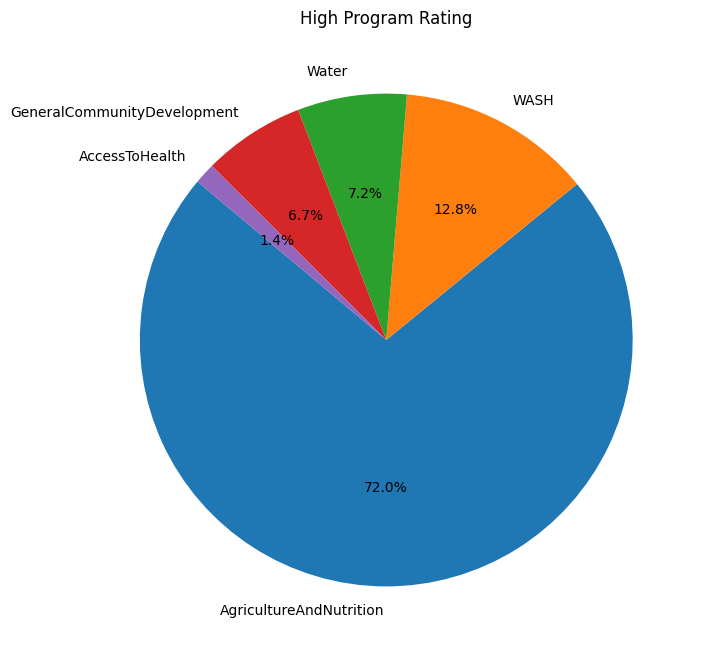

In [66]:
import matplotlib.pyplot as plt

program_counts = HHLevel['high_program_rating'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(program_counts, labels=program_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('High Program Rating')
plt.savefig('high_program_rating_distribution.png')
plt.show()

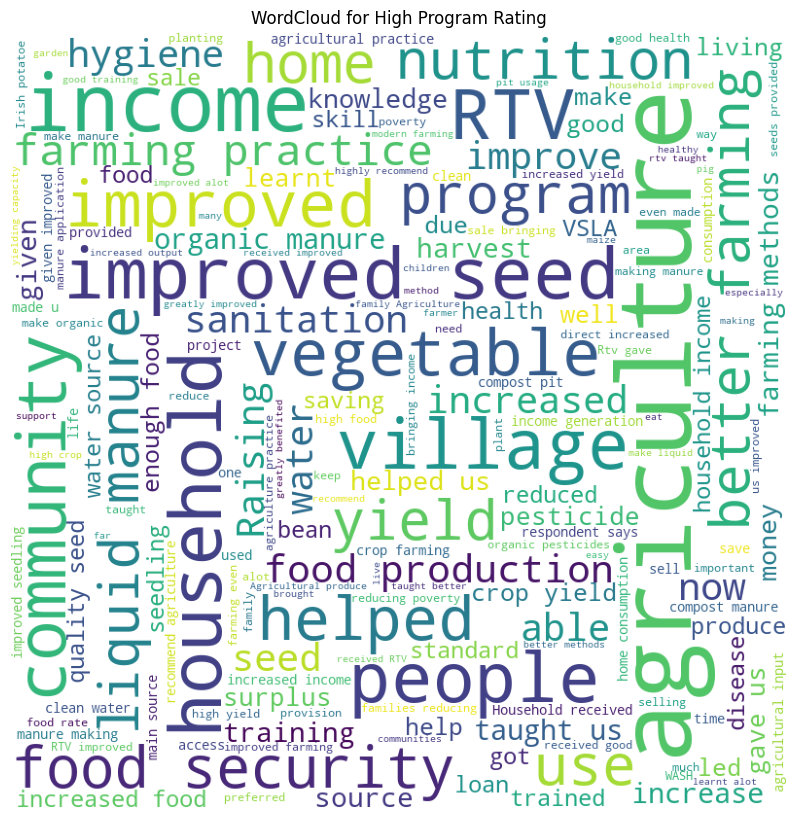

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(HHLevel['high_program_rating_reason'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud for High Program Rating')
plt.savefig('High_prograte.png')
plt.tight_layout(pad=0)

plt.show()

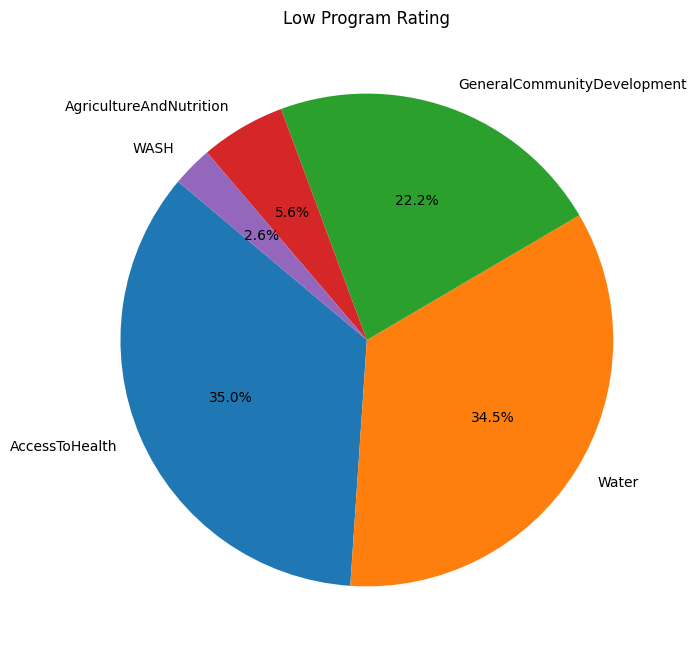

In [68]:
import matplotlib.pyplot as plt

program_counts = HHLevel['low_program_rating'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(program_counts, labels=program_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Low Program Rating')
plt.savefig('low_program_rating_distribution.png')
plt.show()

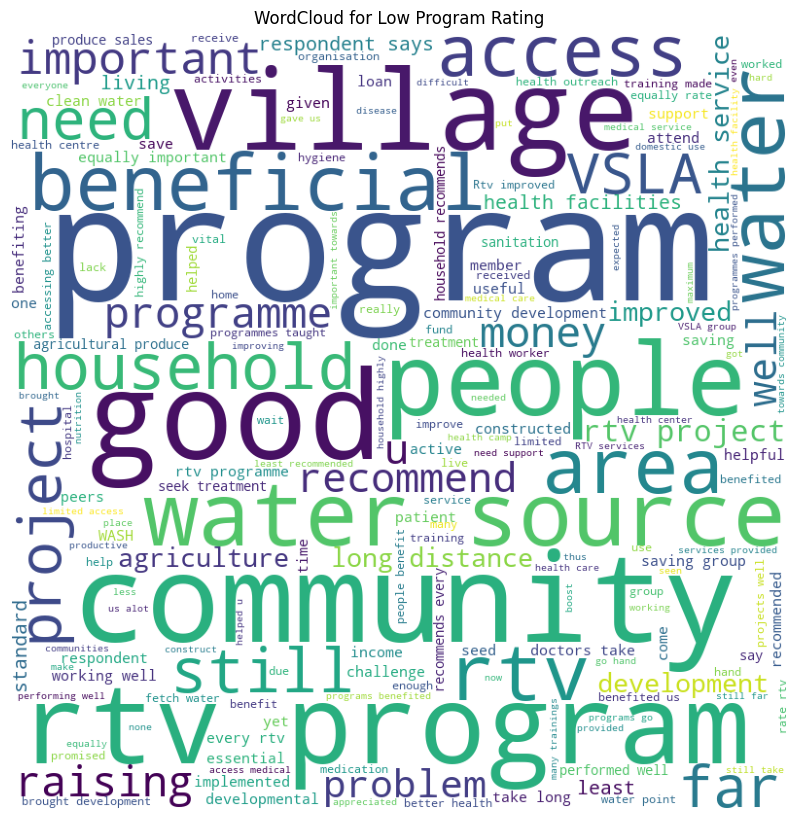

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(HHLevel['low_program_rating_reason'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud for Low Program Rating')
plt.savefig('low_prograte.png')
plt.tight_layout(pad=0)

plt.show()

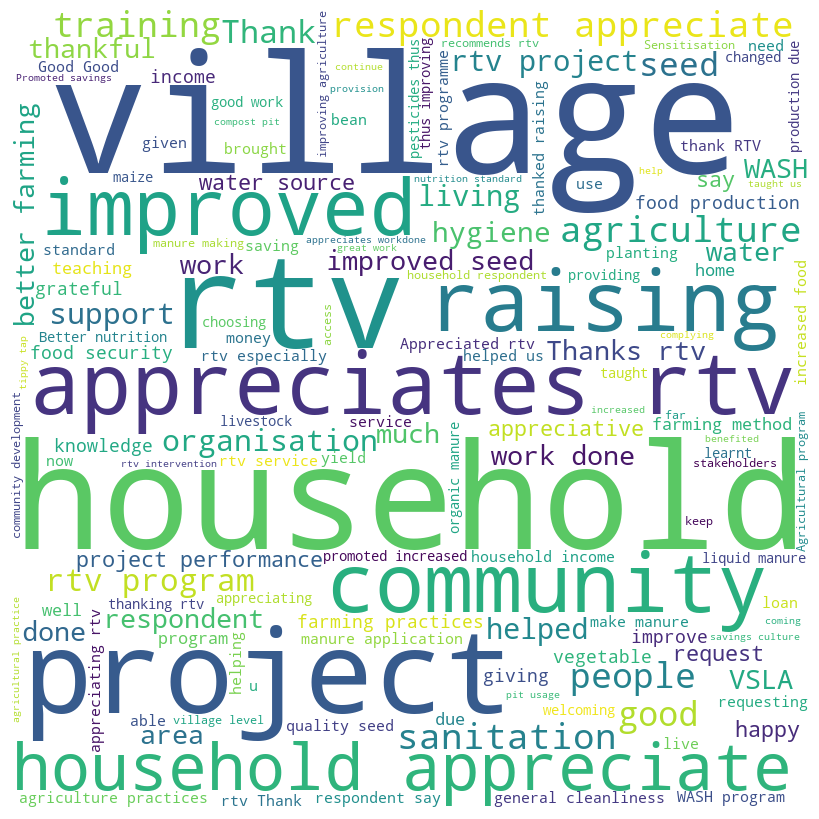

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(HHLevel['hh_comment'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

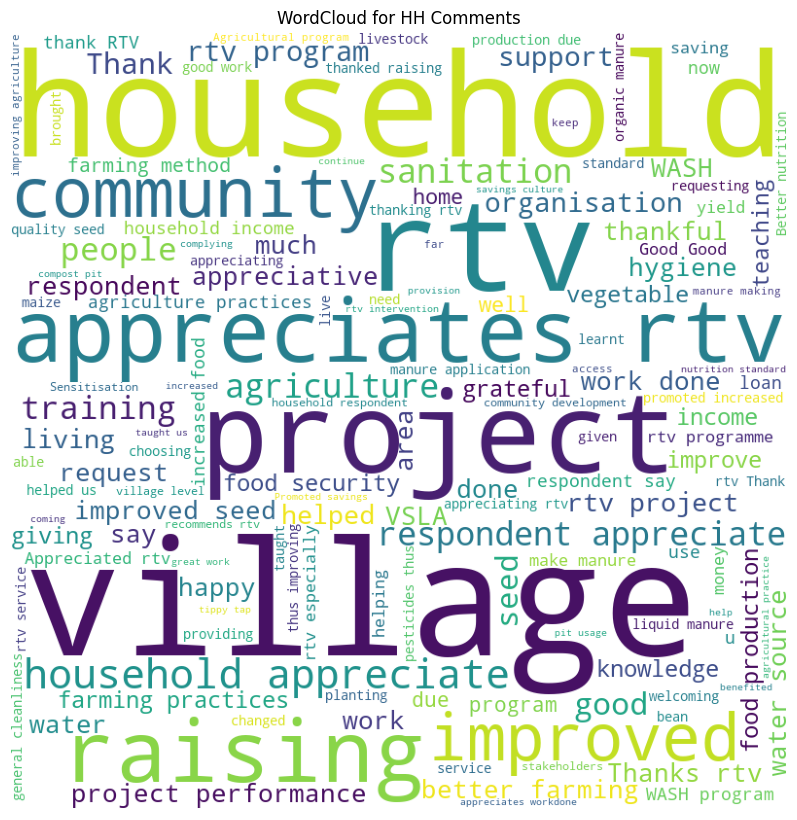

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(HHLevel['hh_comment'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud for HH Comments')
plt.savefig('HHComments.png')
plt.tight_layout(pad=0)

plt.show()

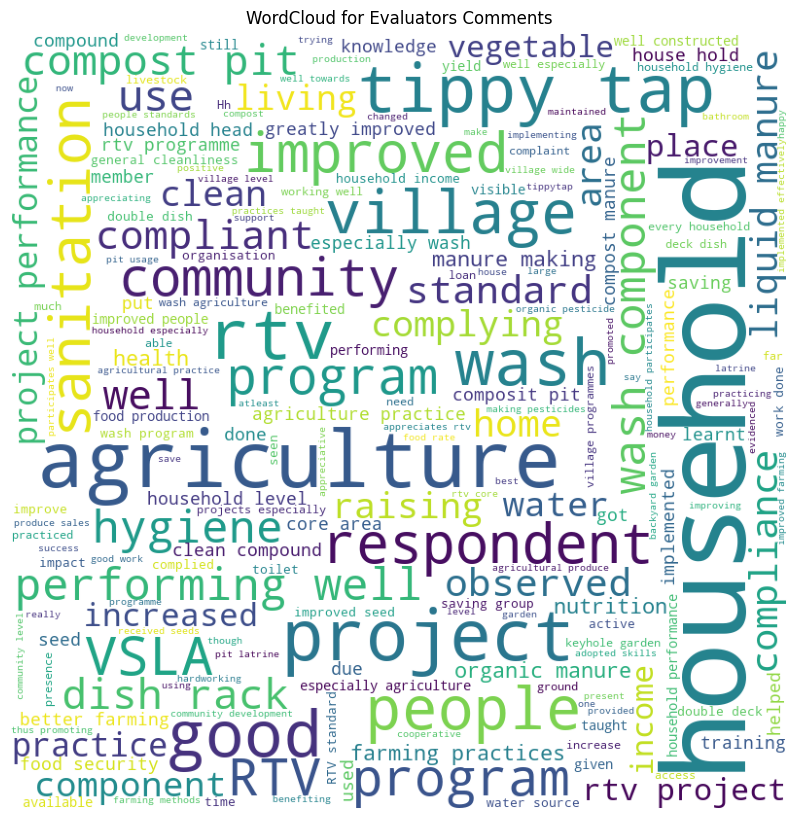

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(HHLevel['evaluators_comment'].dropna())

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud for Evaluators Comments')
plt.savefig('EvaluatorComments.png')
plt.tight_layout(pad=0)

plt.show()

In [85]:
MSC_SEs = pd.read_excel("data/SE_Scores_Master.xlsx")

/Users/rtv-lpt-129/miniconda3/envs/SEs_Work/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [86]:
MSC_SEs.head(1)

,District,Cluster,Villages,Village ID,Cohort,Cycle,Latrine Well Constructed_Base,Latrine cover present_Base,Latrine Environment vegetation free_Base,Latrine door present_Base,...,VSLA Compliance,Water Complaince,Bike Compliance,Average Compliance,Diff month3,Diff month6,Diff month12,Diff month18,Diff month24,Average Performance
0,Kisoro,Bushekwe,Bushekwe,1,2016,1,NaN,NaN,NaN,NaN,...,62.0,56.0,67.0,NaN,0.0,0.0,49.0,59.0,66.0,58.0


In [87]:
Columns = ['District', 'Cluster', 'Villages', 'Cohort', 'Cycle', 'Agric Baseline', 'Agric month3', 'Agric month6', 'Agriculture month12', 'Agri month18',
           'Agric month24', 'WASH Baseline', 'WASH month3', 'WASH month6', 'WASH month12', 'WASH month18',  'WASH month24',   
                       'Livestock Baseline', 'Livestock month3',  'Livestock month6', 'Livestock month12',
                       'Livestock month18',   'Livestock month24']

In [88]:
FilteredData = MSC_SEs[MSC_SEs['Cohort'].isin([2022, 2023, 2024])]

In [89]:
SEsTrends = FilteredData[Columns]
SEsTrends = SEsTrends.sort_values(by=['Cohort', 'Cycle'], ascending=[True, True]).reset_index(drop=True)
SEsTrends = SEsTrends.fillna('-')

In [90]:
SEsTrends.head()

,District,Cluster,Villages,Cohort,Cycle,Agric Baseline,Agric month3,Agric month6,Agriculture month12,Agri month18,...,WASH month6,WASH month12,WASH month18,WASH month24,Livestock Baseline,Livestock month3,Livestock month6,Livestock month12,Livestock month18,Livestock month24
0,Kisoro,Nyarutembe,Busanani,2022,1,5.0,51.56901,80.28,95.69,80.666667,...,95.95,87.35,80.666667,60.400133,2.0,99.305556,98.72,-,81.25,69.69697
1,Kaliro,Gadumire,Bugonya,2022,1,3.0,66.41,14.3075,100.0,71.397436,...,69.02,100.0,71.397436,97.063492,10.0,90.97,50.0,0.0,0.0,70.833333
2,Kaliro,Gadumire,Bunabiro,2022,1,0.0,70.53,51.6675,94.53,81.589285,...,82.92,99.41,81.589285,99.055555,0.0,76.46,66.67,0.0,64.814815,47.5
3,Kaliro,Gadumire,Bususwa,2022,1,0.0,67.22,50.0,95.0,86.0,...,78.63,99.35,91.0,98.646825,4.0,67.263333,88.89,0.0,0.0,73.076923
4,Kaliro,Gadumire,Bugada_Gadumire,2022,1,0.0,87.44,34.445,94.14,81.083334,...,60.89,99.36,81.083334,95.777776,0.0,78.47,83.33,0.0,62.962963,88.492063


In [97]:
SEsTrends.to_excel('Village_Trends.xlsx', index=False)

In [98]:
Month24 = SEsTrends[(SEsTrends['Cohort'] == 2022) & (SEsTrends['Cycle'] == 2)].copy()

In [104]:
ClusterTrends = MSC_SEs.groupby(['District', 'Cluster'])[['Cohort', 'Cycle', 'Agric Baseline', 'Agric month3', 'Agric month6', 'Agriculture month12', 'Agri month18',
           'Agric month24', 'WASH Baseline', 'WASH month3', 'WASH month6', 'WASH month12',    
                     'WASH month6', 'WASH month18',  'WASH month24', 'Livestock Baseline', 'Livestock month3',  'Livestock month6', 'Livestock month12',
                       'Livestock month18',   'Livestock month24']].mean(numeric_only = True).reset_index()

#ClusterTrends = ClusterTrends.sort_values(by=['Cohort', 'Cycle'], ascending=[True, True]).reset_index(drop=True)

In [106]:
FilteredClusterData = ClusterTrends[ClusterTrends['Cohort'].isin([2022, 2023, 2024])]

In [108]:
ClusterT = FilteredClusterData.sort_values(by=['Cohort', 'Cycle'], ascending=[True, True]).reset_index(drop=True)
ClusterT = FilteredClusterData.fillna('-')

In [109]:
ClusterTre = ClusterT.applymap(lambda x: '-' if pd.isna(x) else x)

/var/folders/8v/g75zp59111n27nbw3_c9ypxh0000gn/T/ipykernel_93619/1407293766.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ClusterTre = ClusterT.applymap(lambda x: '-' if pd.isna(x) else x)


In [112]:
ClusterTre.head(2)

,District,Cluster,Cohort,Cycle,Agric Baseline,Agric month3,Agric month6,Agriculture month12,Agri month18,Agric month24,...,WASH month12,WASH month6,WASH month18,WASH month24,Livestock Baseline,Livestock month3,Livestock month6,Livestock month12,Livestock month18,Livestock month24
0,Buhweju,Kayonza,2024.0,1.0,-,66.775491,99.132727,-,-,-,...,-,99.860909,-,-,-,-,70.717273,-,-,-
1,Buhweju,Kemikyera,2024.0,2.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [113]:
ClusterTre.to_excel('Cluster_Tre.xlsx', index=False)

In [107]:
FilteredClusterData.head()

,District,Cluster,Cohort,Cycle,Agric Baseline,Agric month3,Agric month6,Agriculture month12,Agri month18,Agric month24,...,WASH month12,WASH month6,WASH month18,WASH month24,Livestock Baseline,Livestock month3,Livestock month6,Livestock month12,Livestock month18,Livestock month24
0,Buhweju,Kayonza,2024.0,1.0,NaN,66.775491,99.132727,NaN,NaN,NaN,...,NaN,99.860909,NaN,NaN,NaN,NaN,70.717273,NaN,NaN,NaN
1,Buhweju,Kemikyera,2024.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Buhweju,Kiyanja,2024.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Buhweju,Nyakahita,2024.0,1.0,NaN,73.889947,98.886667,NaN,NaN,NaN,...,NaN,99.855556,NaN,NaN,NaN,NaN,72.781111,NaN,NaN,NaN
4,Buhweju,Nyamihira,2024.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
ClusterTrends.to_excel('Cluster_Trends.xlsx', index=False)

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ClusterTrends is your DataFrame

# Define the columns for the agriculture data
agric_columns = ['Agric month3', 'Agric month6', 'Agriculture month12', 'Agri month18', 'Agric month24']

# Create a DataFrame for the plot
plot_data = ClusterTrends[['District'] + agric_columns].set_index('District')

# Plot the stacked column chart
plot_data.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add title and labels
plt.title('Agriculture Progress Over Time by District')
plt.xlabel('District')
plt.ylabel('Mean Value')
plt.legend(title='Time Period', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

KeyError: "['Agric month3', 'Agric month6', 'Agriculture month12', 'Agri month18', 'Agric month24'] not in index"